# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import *
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
from matplotlib import style
from joblib import load
import sklearn as sk

2022-11-30 06:07:07.411191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 06:07:07.495273: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-30 06:07:07.497872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 06:07:07.497880: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Dataset Train preprocesado
ds_train = pd.read_csv('datasets/tp1-train_id.csv')
ds_train = ds_train.drop(['Unnamed: 0'], axis=1)
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,T2FRplBuQeDugP19ZRgAPA==,2021-02-13,2021-03-03,-34.605539,-58.458807,Caballito,Departamento,1.0,1.0,51.0,46.0,82080.0,Departamento 120 Cuotas en Pesos Caballito,1609.411765,Bajo
1,g8aVOW2Z17bZJR1e6g4t3A==,2021-08-19,2021-09-02,-34.609767,-58.446246,Caballito,Departamento,2.0,1.0,43.0,40.0,92000.0,"Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...",2139.534884,Medio
2,XoCYZbNzXTjmPygod5MNSQ==,2021-03-17,2021-06-05,-34.583755,-58.443697,Palermo,Departamento,1.0,1.0,35.0,31.0,93913.0,Departamento - Palermo Hollywood,2683.228571,Medio
3,0jVg3F5shORKa7kKi1Z+9Q==,2021-05-10,2021-06-05,-34.591590,-58.385946,Recoleta,Departamento,4.0,4.0,171.0,163.0,598000.0,SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA,3497.076023,Alto
4,G+PIgKq69d7VmKc9kqyjZQ==,2021-07-23,2021-08-23,-34.609359,-58.383336,Monserrat,Departamento,1.0,1.0,24.0,24.0,47000.0,Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2,1958.333333,Medio


In [3]:
# Dataset Test preprocesado
ds_test = pd.read_csv('datasets/tp1-test_id.csv')
ds_test = ds_test.drop(['Unnamed: 0'], axis=1)
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,zJegknmmtPpgeJnPQNSJhQ==,2021-03-20,2021-04-01,-34.599894,-58.420836,Almagro,Departamento,3.0,2.0,57.0,50.0,90000.0,VENTA DEPARTAMENTO 3 AMBIENTES ALMAGRO BALCON,1578.947368,Bajo
1,a7bK6/yD/LSjTbm+TiQafw==,2021-07-30,9999-12-31,-34.567777,-58.449607,Belgrano,Departamento,3.0,2.0,55.0,50.0,144000.0,Departamento - Belgrano,2618.181818,Medio
2,dVtUS7zXwyfvC6AZa64GWA==,2021-12-16,2022-02-09,-34.566029,-58.454483,Belgrano,Departamento,2.0,1.0,77.0,45.0,110000.0,"2 ambientes + gran patio, Apto Profesional.",1428.571429,Bajo
3,ze5i9YQThl+GSM3kevG8YQ==,2021-02-23,2021-03-26,-34.581881,-58.426657,Palermo,Departamento,1.0,1.0,33.0,29.0,103950.0,Emprendimiento en Palermo Soho - Oro y Charcas,3150.000000,Alto
4,1Xv+X2UtetzcFd8fWA38YA==,2021-10-23,2022-01-27,-34.590154,-58.423578,Palermo,Departamento,3.0,2.0,107.0,107.0,230000.0,Departamento antiguo VENTA en Palermo 3 amb,2149.532710,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16328,u/y3AMJhbQQy0hfKxkqS3Q==,2021-12-16,2022-02-09,-34.595506,-58.401459,Recoleta,Departamento,3.0,2.0,71.0,67.0,139999.0,DEPARTAMENTO VENTA RECOLETA 4 AMBIENTES- PERMUTA,1971.816901,Medio
16329,6RW13KJBgzt3kEqjtd+0ug==,2021-06-23,2021-10-20,-34.639842,-58.427159,Boedo,PH,3.0,2.0,51.0,40.0,75000.0,PH reciclado - Sin expensas - 2 ambientes es...,1470.588235,Medio
16330,PD30Hk4glk4D/0s/tg+wAQ==,2021-04-14,2021-06-05,-34.595876,-58.424643,Palermo,Departamento,1.0,1.0,26.0,26.0,80000.0,VENTA MONOAMBIENTE A ESTRENAR EQUIPADO CON FU...,3076.923077,Alto
16331,A6I5BFY9bRdPPZCSQ63MAg==,2021-01-16,2021-10-09,-34.586985,-58.410102,Palermo,Departamento,4.0,3.0,208.0,208.0,890000.0,Departamento en Palermo,4278.846154,Alto


## Procesamiento del lenguaje natural

### Ampliación del dataset

Este dataset incluye descripciones de las propiedades del otro dataset. Veremos como podemos extraer información de estas descripciones.

In [4]:
descriptions_dataset = pd.read_csv('datasets/properati_argentina_2021_decrip.csv')
descriptions_dataset.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,qg4m3QHcuo1+wMmyp7kx3Q==,Ph 2 Amb. Villa Crespo exclusivo uso profesion...


Tomaremos las descripciones correspondientes a los datasets de train y test

In [5]:
descriptions_train = descriptions_dataset[descriptions_dataset.id.isin(ds_train.id)].copy()
descriptions_test = descriptions_dataset[descriptions_dataset.id.isin(ds_test.id)].copy()
descriptions_train.shape, descriptions_test.shape

((69675, 2), (16333, 2))

#### Análisis de sentimientos - Tecnica Minqing Hu y Bing Liu

Una forma de analizar el sentimiento de un de un texto es considerando su sentimiento como la suma de los sentimientos de cada una de las palabras que lo forman.

Para el analisis de sentimiento nos guiamos del analisis realizado en esta pagina: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

Utilizamos algunas funciones de tokenizacion y limpieza de ahi con alguna sutil modificacion para nuestro caso de uso en particular.

In [6]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = str(texto).lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return (nuevo_texto)

In [7]:
# se aplica la función de limpieza a train y test y tokenización a cada descripcion

tokenized_train = pd.concat([descriptions_train.id, descriptions_train['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_test = pd.concat([descriptions_test.id, descriptions_test['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_train.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,"[corredor, responsable, maria, alejandra, geno..."
3,gn55JPmcjftBV/at1a7fPg==,"[unico, ph, de, dormitorios, en, impecable, es..."
10,+9uGr8tPEUkKnpjOef+gUw==,"[se, vende, excelente, ph, de, cómodos, ambien..."
11,uH5H+RfQM87Qtrb13+T4hA==,"[venta, ph, ambientes, paternal, br, br, cálid..."
12,tto06YVR54II+aQABaJ6ug==,"[ph, de, ambientes, en, mataderos, desarrollad..."


Separamos los tokens según ids tanto en train como en test.

In [8]:
tokens_train = tokenized_train.explode(column='property_description')
tokens_train = tokens_train.rename(columns={'property_description': 'token'})
tokens_train.reset_index(inplace=True, drop=True)
tokens_train.head()

,id,token
0,BZCeiGkJr1WBUi6pKJQwJQ==,corredor
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable
2,BZCeiGkJr1WBUi6pKJQwJQ==,maria
3,BZCeiGkJr1WBUi6pKJQwJQ==,alejandra
4,BZCeiGkJr1WBUi6pKJQwJQ==,genoveva


In [9]:
# Replicamos en test.
tokens_test = tokenized_test.explode(column='property_description')
tokens_test = tokens_test.rename(columns={'property_description': 'token'})
tokens_test.reset_index(inplace=True, drop=True)

In [10]:
tokens_train.shape, tokens_test.shape

((12955636, 2), (3076221, 2))

Vemos que tenemos 11 millones de palabras en train y 3 millones en test

Notamos que las preposiciones no son relevantes para entender que atributo podria ser mejor para expandir el datast, asi que decidimos agregarlas como stopwords.

Tampoco van a variar mucho el analisis de sentimiento realizado en este trabajo.

In [11]:
## listado de stopwords

preposiciones = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                 "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "vía"]

stop_words = []

stop_words += preposiciones

# filtrado para excluir stopwords
tokens_train = tokens_train[~(tokens_train["token"].isin(stop_words))]

tokens_test = tokens_test[~(tokens_test["token"].isin(stop_words))]

Agregamos un lexicon en español de esta pagina: https://github.com/jboscomendoza/lexicos-nrc-afinn

In [12]:
# lexicon sentimientos
lexicon = pd.read_csv('datasets/lexico_nrc.csv')
lexicon

,palabra,sentimiento,word
0,ciegamente,negativo,blindly
1,ciegamente,tristeza,blindly
2,a distancia,negativo,aloof
3,a hurtadillas,sorpresa,stealthily
4,a la deriva,anticipación,adrift
...,...,...,...
15302,zumbido,anticipación,buzz
15303,zumbido,miedo,buzz
15304,zumbido,positivo,buzz
15305,zumbido,negativo,drone


In [13]:
def mappear_valores_sentimiento(s):
    # 1 Positivo
    # 0 Neutro
    # -1 Negativo
    sentimiento_numerico = 0
    if str(s) in ['negativo', 'tristeza', 'miedo', 'enfado', 'tristeza', 'asco']:
        sentimiento_numerico = -1
    if str(s) in ['sorpresa', 'positivo', 'confianza', 'alegría']:
        sentimiento_numerico = 1
    if str(s) in ['anticipación']:
        sentimiento_numerico = 0

    return sentimiento_numerico


In [14]:
lexicon['sentimiento'] = lexicon['sentimiento'].apply(lambda x: mappear_valores_sentimiento(x))
lexicon[['sentimiento']].head()

,sentimiento
0,-1
1,-1
2,-1
3,1
4,0


In [15]:
tokens_train[tokens_train.token.isin(lexicon.palabra)].shape, tokens_test[tokens_test.token.isin(lexicon.palabra)].shape

((1513108, 2), (359986, 2))

In [16]:
lexicon

,palabra,sentimiento,word
0,ciegamente,-1,blindly
1,ciegamente,-1,blindly
2,a distancia,-1,aloof
3,a hurtadillas,1,stealthily
4,a la deriva,0,adrift
...,...,...,...
15302,zumbido,0,buzz
15303,zumbido,-1,buzz
15304,zumbido,1,buzz
15305,zumbido,-1,drone


Tenemos un millon y medio de coincidencias con el lexicón en train. Usaremos estos sentimientos para puntuar las propiedades

In [17]:
# sentimiento promedio de cada descripcion
tokens_sentimientos_train = pd.merge(
    left=tokens_train,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_train = tokens_sentimientos_train.drop(columns=["palabra", "word"])

tokens_sentimientos_test = pd.merge(
    left=tokens_test,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_test = tokens_sentimientos_test.drop(columns=["palabra", "word"])

tokens_sentimientos_train.head()

,id,token,sentimiento
0,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
2,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
3,boCXaj+OYbucoJeinbtaOg==,responsable,1
4,boCXaj+OYbucoJeinbtaOg==,responsable,1


Ahora calcularemos el puntaje para cada propiedad como la suma de los sentimientos.

In [18]:
score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

/tmp/ipykernel_37393/4004910310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()
/tmp/ipykernel_37393/4004910310.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()


In [19]:
score_train

,id,sentimiento
0,+++LrfX9dl/rsnbNTgVaSw==,24
1,++170jViMoXTsnGwVScNsA==,5
2,++20Jf3Ha2Epz88cJxEmJw==,10
3,++2AcJNn9KYBeuOard+DZw==,18
4,++5o0X5nwMy3BtfAvsFAaA==,-2
...,...,...
69102,zzifKawPn7V8Z63LI9+K9Q==,16
69103,zziqoG25k9M8rIgzpKwFwg==,29
69104,zzjbYucw7Rj0OtPfDWrsuA==,15
69105,zzkHuJd+M8QH9JSoKm9e0A==,19


In [20]:
score_train.sentimiento.max()

216

La mejor propiedad tiene un puntaje de 216. Analizaremos un poco las descripciones de las mejores y peores.

In [21]:
top5_positivas = score_train.sort_values(by='sentimiento', ascending=False).head(5)
top5_positivas

,id,sentimiento
63991,vJRa8QKk0d9i9L4Rk6Bvng==,216
20670,HApisqgDT/EcQsf/Z9pwSA==,185
27513,NX8OeQx/kxiBz8ehRtMggw==,185
36233,Vi4Kbdne9us6XT3kpmSmgw==,185
27436,NS5VTpskGHaO9KLSV67sRA==,184


In [22]:
descriptions_train.property_description.iloc[top5_positivas.index]

432766    VG3850 esta ubicado en la mejor zona del barri...
137607    Monoambiente en excelente ubicación, baño y co...
183185    Muy buen departamento de dos ambientes con bal...
243643    Penthouse con terraza propia. Cochera. Baulera...
182309    Corredor Responsable: Raul Hector Merlo - CUCI...
Name: property_description, dtype: object

In [23]:
score_train.sentimiento.min()

-37

In [24]:
top5_negativas = score_train.sort_values(by='sentimiento').head(5)
top5_negativas

,id,sentimiento
24355,KWFIk6SR8JFrfLNsfJcoPg==,-37
67029,y6+EaqbgQiNEm0O9xuj5qA==,-23
62608,u/IcqZ+M9BeXX58mOBAsXw==,-23
67565,yZ1q8SipMwHAKNK0xa1ApQ==,-22
62020,tT6oySFAhaUtHOUoCPT5nQ==,-20


In [25]:
descriptions_train.iloc[top5_negativas.index].property_description

162747    VENTA DEPARTAMENTO 2 AMBIENTES EN COHGLAN<br><...
447358    Corredor Responsable: Brian Ezequiel Roldán CP...
423924    Corredor Responsable: IGNACIO FEIJOO - CUCICBA...
449641    Corredor Responsable: Gustavo Guastello CUCICB...
420368    Monoambiente con balcón a estrenar con ameniti...
Name: property_description, dtype: object

descriptions_test.head()Como es claro, la gente que publica la venta de una propiedad va a tratar de expresar la mejor publicacion y descripcion posible. Es por eso que tenemos una tasa altisima de positividad. No buscamos hacer un analisis tan profundo de las descripciones sino crear un puntaje relativamente estandarizado para poder usar la descripción como feature.

In [26]:
def perfil_sentimientos(title, df):
    print(title)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")


perfil_sentimientos("Train: ", score_train)
print()
perfil_sentimientos("Test: ", score_test)

Train: 
Positivos: 93.57
Neutros  : 1.57
Negativos: 4.86

Test: 
Positivos: 93.68
Neutros  : 1.66
Negativos: 4.66


Finalmente, agregaremos nuestro puntaje como columnas nuevas del dataset.

In [27]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,zJegknmmtPpgeJnPQNSJhQ==,2021-03-20,2021-04-01,-34.599894,-58.420836,Almagro,Departamento,3.0,2.0,57.0,50.0,90000.0,VENTA DEPARTAMENTO 3 AMBIENTES ALMAGRO BALCON,1578.947368,Bajo
1,a7bK6/yD/LSjTbm+TiQafw==,2021-07-30,9999-12-31,-34.567777,-58.449607,Belgrano,Departamento,3.0,2.0,55.0,50.0,144000.0,Departamento - Belgrano,2618.181818,Medio
2,dVtUS7zXwyfvC6AZa64GWA==,2021-12-16,2022-02-09,-34.566029,-58.454483,Belgrano,Departamento,2.0,1.0,77.0,45.0,110000.0,"2 ambientes + gran patio, Apto Profesional.",1428.571429,Bajo
3,ze5i9YQThl+GSM3kevG8YQ==,2021-02-23,2021-03-26,-34.581881,-58.426657,Palermo,Departamento,1.0,1.0,33.0,29.0,103950.0,Emprendimiento en Palermo Soho - Oro y Charcas,3150.000000,Alto
4,1Xv+X2UtetzcFd8fWA38YA==,2021-10-23,2022-01-27,-34.590154,-58.423578,Palermo,Departamento,3.0,2.0,107.0,107.0,230000.0,Departamento antiguo VENTA en Palermo 3 amb,2149.532710,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16328,u/y3AMJhbQQy0hfKxkqS3Q==,2021-12-16,2022-02-09,-34.595506,-58.401459,Recoleta,Departamento,3.0,2.0,71.0,67.0,139999.0,DEPARTAMENTO VENTA RECOLETA 4 AMBIENTES- PERMUTA,1971.816901,Medio
16329,6RW13KJBgzt3kEqjtd+0ug==,2021-06-23,2021-10-20,-34.639842,-58.427159,Boedo,PH,3.0,2.0,51.0,40.0,75000.0,PH reciclado - Sin expensas - 2 ambientes es...,1470.588235,Medio
16330,PD30Hk4glk4D/0s/tg+wAQ==,2021-04-14,2021-06-05,-34.595876,-58.424643,Palermo,Departamento,1.0,1.0,26.0,26.0,80000.0,VENTA MONOAMBIENTE A ESTRENAR EQUIPADO CON FU...,3076.923077,Alto
16331,A6I5BFY9bRdPPZCSQ63MAg==,2021-01-16,2021-10-09,-34.586985,-58.410102,Palermo,Departamento,4.0,3.0,208.0,208.0,890000.0,Departamento en Palermo,4278.846154,Alto


In [28]:
ds_train = pd.merge(ds_train, score_train, on='id')
ds_train.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)
ds_test = pd.merge(ds_test, score_test, on='id')
ds_test.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)

In [29]:
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos
0,T2FRplBuQeDugP19ZRgAPA==,2021-02-13,2021-03-03,-34.605539,-58.458807,Caballito,Departamento,1.0,1.0,51.0,46.0,82080.0,Departamento 120 Cuotas en Pesos Caballito,1609.411765,Bajo,-5
1,g8aVOW2Z17bZJR1e6g4t3A==,2021-08-19,2021-09-02,-34.609767,-58.446246,Caballito,Departamento,2.0,1.0,43.0,40.0,92000.0,"Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...",2139.534884,Medio,29
2,XoCYZbNzXTjmPygod5MNSQ==,2021-03-17,2021-06-05,-34.583755,-58.443697,Palermo,Departamento,1.0,1.0,35.0,31.0,93913.0,Departamento - Palermo Hollywood,2683.228571,Medio,15
3,0jVg3F5shORKa7kKi1Z+9Q==,2021-05-10,2021-06-05,-34.591590,-58.385946,Recoleta,Departamento,4.0,4.0,171.0,163.0,598000.0,SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA,3497.076023,Alto,12
4,G+PIgKq69d7VmKc9kqyjZQ==,2021-07-23,2021-08-23,-34.609359,-58.383336,Monserrat,Departamento,1.0,1.0,24.0,24.0,47000.0,Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2,1958.333333,Medio,3


#### Tecnica Regex

Revisamos las siguientes paginas para entender cuales son los ammenities mas buscados en CABA, y en Argentina en general.

https://www.iprofesional.com/negocios/371702-cuales-son-los-amenities-mas-exoticos-de-edificios-en-argentina

https://www.baenegocios.com/sociedad/Ranking-de-amenities-los-servicios-que-mas-pesan-al-comprar-una-propiedad-20220119-0068.html

https://www.forbesargentina.com/negocios/amenities-servicios-mas-demandados-argentinos-comprar-una-propiedad-n11901

Dichos ammenities parecen hacer que la propiedad cotice entre un 15% y un 20% más que el precio de venta.

Sacando un promedio y haciendo un top-5 ranking, podemos notar que los mas relevantes son:

- Garage/Estacionamiento
- Pileta
- Jardin/Espacio al aire libre
- Parrilla
- SUM (Gimnasio/Spa/Sauna)

Al buscar estos datos, podriamos tratar de entender si el precio resulta mayor, contra una propiedad de similares caracteristicas pero sin estos ammenities y a partir de eso, entender que % varía del precio de venta original.

In [30]:
def calculate_freq(feature, regex):
    freq = descriptions_train.property_description.str.contains(regex, regex=True).sum()
    print(
        f"Los anuncios de propiedades que tienen la feature {feature} son: {freq} y representan el {freq * 100 // len(descriptions_train)}% de los datos")

##### Amenities

In [31]:
garage = re.compile(r"\s*garage|garaje|estacionamiento|parking")
calculate_freq("Garage", garage)

Los anuncios de propiedades que tienen la feature Garage son: 1460 y representan el 2% de los datos


In [32]:
pileta = re.compile(r"\s*pileta")
calculate_freq("Pileta", pileta)

Los anuncios de propiedades que tienen la feature Pileta son: 4610 y representan el 6% de los datos


In [33]:
jardin = re.compile(r"\s*jardin|espacio verde")
calculate_freq("Jardín", jardin)

Los anuncios de propiedades que tienen la feature Jardín son: 1451 y representan el 2% de los datos


In [34]:
parrilla = re.compile(r"\s*parrilla|bbq")
calculate_freq("Parrilla", parrilla)

Los anuncios de propiedades que tienen la feature Parrilla son: 12815 y representan el 18% de los datos


In [35]:
sum = re.compile(r"\s*zoom|sum|gimansio|spa")
calculate_freq("SUM", sum)

Los anuncios de propiedades que tienen la feature SUM son: 26222 y representan el 37% de los datos


In [36]:
balcon = re.compile(r"\s*balcon|balcón")
calculate_freq("Balcón", balcon)

Los anuncios de propiedades que tienen la feature Balcón son: 32787 y representan el 47% de los datos


Otro aspecto interesante que dejamos fuera del análisis es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una amenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta. De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

Por último, construiremos columnas booleanas para los mejores features y las agregaremos a nuestros datasets. Usaremos parrilla, sum, balcón y pileta.

In [37]:
amenities_train = pd.DataFrame({
    'id': descriptions_train.id,
    'pileta': descriptions_train.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_train.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_train.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_train.property_description.str.contains(sum, regex=True)
})
amenities_train.head()

,id,pileta,parrilla,balcon,sum
0,BZCeiGkJr1WBUi6pKJQwJQ==,False,False,False,False
3,gn55JPmcjftBV/at1a7fPg==,False,False,False,False
10,+9uGr8tPEUkKnpjOef+gUw==,False,False,False,False
11,uH5H+RfQM87Qtrb13+T4hA==,False,False,False,False
12,tto06YVR54II+aQABaJ6ug==,False,False,False,False


In [38]:
# Replicamos lo mismo en test
amenities_test = pd.DataFrame({
    'id': descriptions_test.id,
    'pileta': descriptions_test.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_test.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_test.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_test.property_description.str.contains(sum, regex=True)
})
amenities_test.head()

,id,pileta,parrilla,balcon,sum
2,TUL813tXchVBlHUsfaA6DA==,False,True,True,False
16,n7NJmavbeNUlyKufoGRr+g==,False,False,False,False
151,ns8QWxBXYIdnEccdiu3qog==,False,False,False,False
153,lZyClw0vqQvUiJkIemcg8A==,False,False,True,True
224,FZ+k4wGZyeJ+BWk+xJNPSw==,False,False,False,False


In [39]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos
0,zJegknmmtPpgeJnPQNSJhQ==,2021-03-20,2021-04-01,-34.599894,-58.420836,Almagro,Departamento,3.0,2.0,57.0,50.0,90000.0,VENTA DEPARTAMENTO 3 AMBIENTES ALMAGRO BALCON,1578.947368,Bajo,31
1,a7bK6/yD/LSjTbm+TiQafw==,2021-07-30,9999-12-31,-34.567777,-58.449607,Belgrano,Departamento,3.0,2.0,55.0,50.0,144000.0,Departamento - Belgrano,2618.181818,Medio,8
2,dVtUS7zXwyfvC6AZa64GWA==,2021-12-16,2022-02-09,-34.566029,-58.454483,Belgrano,Departamento,2.0,1.0,77.0,45.0,110000.0,"2 ambientes + gran patio, Apto Profesional.",1428.571429,Bajo,33
3,ze5i9YQThl+GSM3kevG8YQ==,2021-02-23,2021-03-26,-34.581881,-58.426657,Palermo,Departamento,1.0,1.0,33.0,29.0,103950.0,Emprendimiento en Palermo Soho - Oro y Charcas,3150.000000,Alto,12
4,1Xv+X2UtetzcFd8fWA38YA==,2021-10-23,2022-01-27,-34.590154,-58.423578,Palermo,Departamento,3.0,2.0,107.0,107.0,230000.0,Departamento antiguo VENTA en Palermo 3 amb,2149.532710,Medio,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,u/y3AMJhbQQy0hfKxkqS3Q==,2021-12-16,2022-02-09,-34.595506,-58.401459,Recoleta,Departamento,3.0,2.0,71.0,67.0,139999.0,DEPARTAMENTO VENTA RECOLETA 4 AMBIENTES- PERMUTA,1971.816901,Medio,44
16202,6RW13KJBgzt3kEqjtd+0ug==,2021-06-23,2021-10-20,-34.639842,-58.427159,Boedo,PH,3.0,2.0,51.0,40.0,75000.0,PH reciclado - Sin expensas - 2 ambientes es...,1470.588235,Medio,43
16203,PD30Hk4glk4D/0s/tg+wAQ==,2021-04-14,2021-06-05,-34.595876,-58.424643,Palermo,Departamento,1.0,1.0,26.0,26.0,80000.0,VENTA MONOAMBIENTE A ESTRENAR EQUIPADO CON FU...,3076.923077,Alto,48
16204,A6I5BFY9bRdPPZCSQ63MAg==,2021-01-16,2021-10-09,-34.586985,-58.410102,Palermo,Departamento,4.0,3.0,208.0,208.0,890000.0,Departamento en Palermo,4278.846154,Alto,19


In [40]:
ds_train = pd.merge(ds_train, amenities_train, on='id')
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,T2FRplBuQeDugP19ZRgAPA==,2021-02-13,2021-03-03,-34.605539,-58.458807,Caballito,Departamento,1.0,1.0,51.0,46.0,82080.0,Departamento 120 Cuotas en Pesos Caballito,1609.411765,Bajo,-5,False,False,True,True
1,g8aVOW2Z17bZJR1e6g4t3A==,2021-08-19,2021-09-02,-34.609767,-58.446246,Caballito,Departamento,2.0,1.0,43.0,40.0,92000.0,"Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...",2139.534884,Medio,29,False,False,False,True
2,XoCYZbNzXTjmPygod5MNSQ==,2021-03-17,2021-06-05,-34.583755,-58.443697,Palermo,Departamento,1.0,1.0,35.0,31.0,93913.0,Departamento - Palermo Hollywood,2683.228571,Medio,15,False,False,True,True
3,0jVg3F5shORKa7kKi1Z+9Q==,2021-05-10,2021-06-05,-34.591590,-58.385946,Recoleta,Departamento,4.0,4.0,171.0,163.0,598000.0,SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA,3497.076023,Alto,12,False,False,True,True
4,G+PIgKq69d7VmKc9kqyjZQ==,2021-07-23,2021-08-23,-34.609359,-58.383336,Monserrat,Departamento,1.0,1.0,24.0,24.0,47000.0,Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2,1958.333333,Medio,3,False,False,False,False


In [41]:
ds_test = pd.merge(ds_test, amenities_test, on='id')
ds_test.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,zJegknmmtPpgeJnPQNSJhQ==,2021-03-20,2021-04-01,-34.599894,-58.420836,Almagro,Departamento,3.0,2.0,57.0,50.0,90000.0,VENTA DEPARTAMENTO 3 AMBIENTES ALMAGRO BALCON,1578.947368,Bajo,31,False,False,True,False
1,a7bK6/yD/LSjTbm+TiQafw==,2021-07-30,9999-12-31,-34.567777,-58.449607,Belgrano,Departamento,3.0,2.0,55.0,50.0,144000.0,Departamento - Belgrano,2618.181818,Medio,8,False,False,False,False
2,dVtUS7zXwyfvC6AZa64GWA==,2021-12-16,2022-02-09,-34.566029,-58.454483,Belgrano,Departamento,2.0,1.0,77.0,45.0,110000.0,"2 ambientes + gran patio, Apto Profesional.",1428.571429,Bajo,33,False,False,False,False
3,ze5i9YQThl+GSM3kevG8YQ==,2021-02-23,2021-03-26,-34.581881,-58.426657,Palermo,Departamento,1.0,1.0,33.0,29.0,103950.0,Emprendimiento en Palermo Soho - Oro y Charcas,3150.000000,Alto,12,False,False,False,False
4,1Xv+X2UtetzcFd8fWA38YA==,2021-10-23,2022-01-27,-34.590154,-58.423578,Palermo,Departamento,3.0,2.0,107.0,107.0,230000.0,Departamento antiguo VENTA en Palermo 3 amb,2149.532710,Medio,20,False,False,False,False


##### Expensas

Por último, trabajaremos en crear una columna numérica con el valor de las expensas. Evaluaremos primero que porcentaje de valores podemos conseguir con regex

In [42]:
expensas = re.compile(r"\s*[0-9.]*\s*exp|expensas")
calculate_freq("Expensas", expensas)

Los anuncios de propiedades que tienen la feature Expensas son: 21748 y representan el 35% de los datos


In [43]:
expensas_extract = re.compile('((?:[a-zA-Z0-9]+\s*){5}(?:expensas|exp)\s(?:[a-zA-Z0-9]+\s){10})')
expensas_train = descriptions_train.property_description.str.extract(expensas_extract)
expensas_train.value_counts()

KeyboardInterrupt: 

In [ ]:
expensas_extract = re.compile('((?:[0-9a-zA-Z,.]+\s*){5}?(?:con|sin|de)\s*(?:expensas|exp))')
expensas_train = descriptions_train.sample(100).property_description.str.extract(expensas_extract)

In [ ]:
sin_expensas = re.compile('\s*([0-9.]+)\s*exp|expensas')
descriptions_train.property_description.str.extract(sin_expensas)

## Modelos

#### Selección de features

Para entrenar los modelos usaremos nuestro dataset recien generado, descartaremos el id, el título y las fechas. Convertiremos las categóricas en variables numéricas.

In [44]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'latitud', 'longitud', 'place_l3',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_title', 'score_sentimientos', 'pileta', 'parrilla', 'balcon',
       'sum'],
      dtype='object')

In [1]:
ds_trabajo_train = ds_train.drop(['id','property_title', 'start_date', 'end_date'], axis=1)
ds_trabajo_train['place_l3'] = pd.factorize(ds_train['place_l3'])[0]
ds_trabajo_train['property_type'] = pd.factorize(ds_train['property_type'])[0]
ds_trabajo_train

NameError: name 'ds_train' is not defined

In [46]:
## Replicamos en test
ds_trabajo_test = ds_test.drop(['id','property_title', 'start_date', 'end_date'], axis=1)
ds_trabajo_test['place_l3'] = pd.factorize(ds_test['place_l3'])[0]
ds_trabajo_test['property_type'] = pd.factorize(ds_test['property_type'])[0]
ds_trabajo_test

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.577306,-58.434056,0,0,3.0,2.0,68.0,68.0,158000.0,29,False,False,False,False
1,-34.558066,-58.473512,1,1,6.0,5.0,341.0,206.0,399000.0,16,False,False,False,False
2,-34.545531,-58.474900,2,2,1.0,1.0,20.0,20.0,45000.0,38,False,False,False,True
3,-34.605870,-58.457702,3,0,3.0,2.0,60.0,52.0,149000.0,74,False,False,True,False
4,-34.587415,-58.438877,0,0,2.0,1.0,99.0,58.0,210000.0,3,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,-34.562450,-58.454040,1,0,3.0,2.0,76.0,70.0,204000.0,18,False,False,False,True
11948,-34.598424,-58.440173,24,0,4.0,3.0,136.0,123.0,299000.0,23,False,False,True,False
11949,-34.639597,-58.369096,16,0,2.0,1.0,105.0,92.0,230000.0,3,True,False,True,True
11950,-34.574611,-58.492324,4,0,2.0,1.0,67.0,59.0,119538.0,6,False,False,False,False


In [47]:
ds_trabajo_train.shape, ds_trabajo_test.shape

((60220, 14), (11952, 14))

Sacamos la variable target y creamos nuestros datasets de entrenamiento

In [48]:
columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'place_l3',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'score_sentimientos',
 'pileta',
 'parrilla',
 'balcon',
 'sum']

In [49]:
x_train = ds_trabajo_train.loc[:, columnas_predictoras]
x_test = ds_trabajo_test.loc[:, columnas_predictoras]

y_train = ds_trabajo_train.property_price
y_test = ds_trabajo_test.property_price

In [50]:
x_train

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.589481,-58.389144,0,0,4.0,3.0,192.0,170.0,13,False,False,False,False
1,-34.555436,-58.475303,1,0,3.0,2.0,83.0,83.0,11,False,True,False,False
2,-34.577124,-58.475892,2,1,4.0,3.0,150.0,105.0,24,False,False,True,False
3,-34.639306,-58.368501,3,0,2.0,1.0,122.0,75.0,34,False,False,False,True
4,-34.563572,-58.439407,4,0,3.0,2.0,50.0,50.0,44,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60215,-34.586508,-58.406691,4,0,1.0,1.0,25.0,25.0,10,False,False,False,False
60216,-34.566244,-58.441729,8,0,5.0,4.0,204.0,195.0,-4,True,False,False,False
60217,-34.590336,-58.403250,0,0,1.0,1.0,31.0,31.0,24,False,False,False,True
60218,-34.565196,-58.455010,8,0,1.0,1.0,34.0,34.0,12,False,False,False,False


#### XGBoost - Regresión

best_xgb_tp1 es el arbol que tiene los mejores hiper parametros y estimaodores obtenidos en el TP1.

In [53]:
def regression_metrics(title, real, predicted):
    mse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted)
    rmse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted, squared=False)
    r2 = sk.metrics.r2_score(y_true=real, y_pred=predicted)

    print(title)
    print(f"El error (mse) es: {mse}")
    print(f"El error (rmse) es: {rmse}")
    print(f"El error (r²) es: {r2}\n")

In [54]:
best_xgb_tp1 = load('XGBoost-pca.joblib')

In [60]:
best_xgb_tp1.fit(x_train_transform, y_train)
y_pred = best_xgb_tp1.predict(x_train_transform)
y_pred_test = best_xgb_tp1.predict(x_test)

##### Metricas obtenidas con el dataset del TP1.

Metricas XGBoost optimizado - Train

El error (mse) es: 761704416.3937123

El error (rmse) es: 27598.993032241455

El error (r²) es: 0.9652453545965177

---------------------------------------

Metricas XGBoost optimizado - Test

El error (mse) es: 3287902738.8784523

El error (rmse) es: 57340.23664825994

El error (r²) es: 0.8477123168506954

In [61]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 310483684.63591903
El error (rmse) es: 17620.54722861691
El error (r²) es: 0.9867038269742688

Metricas XGBoost optimizado - Test
El error (mse) es: 474400881238.2627
El error (rmse) es: 688767.6540301981
El error (r²) es: -26.339050189979016



Utilizamos esta pagina como soporte para entender mejor que representa cada metrica de error: 

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

**Train**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: 432564299. Esto significa que el error se redujo un 400%. Esto es relevante ya que esta metrica nos dice sobre cuan bueno es realmente el modelo entrenado.

Luego, para **RMSE** tenemos un delta de: 9456. Esto significa que el error se redujo un 65%.

Finalmente para **R2** obtuvimos un delta de: -0,19. Esto significa que el modelo mejoró un 20%, ya que, mientras mas tengamos un valor mas cercano a uno, tenemos un modelo con un error cercano a cero.

**Test**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: -96136560337. Esto significa que el error en test empeoró un 3%. 

Luego, para **RMSE** tenemos un delta de: -257976,21245748526. Esto significa que el error empeoró un 550%.

Finalmente para **R2** obtuvimos un delta de: 0,52. Esto significa que el modelo empeoró un 52%.

##### Nuevos Hiperparametros optimizados con el nuevo dataset ampliado.

In [62]:
from xgboost import XGBRegressor

#Cantidad de combinaciones que quiero porbar
n = 10

params = {
    "max_depth": [3, 12, 4],
    "learning_rate": [0.02, 0.03, 0.06],
    "min_child_weight": [2, 12, 2],
    "n_estimators": [100, 350],
    'alpha': np.linspace(0.03, 0.09, n),
}

kfold = KFold(n_splits=5)

search_regressor = XGBRegressor()

search = RandomizedSearchCV(search_regressor, params, cv=5, random_state=9, n_iter=10, verbose=10000)

search.fit(x_train_transform, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 1/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.865 total time=   0.8s
[CV 2/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 2/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.860 total time=   0.8s
[CV 3/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 3/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.865 total time=   0.8s
[CV 4/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 4/5; 1/10

[CV 1/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.909 total time=   4.2s
[CV 2/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 2/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.899 total time=   4.2s
[CV 3/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 3/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.907 total time=   4.2s
[CV 4/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 4/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.903 total time=   4.2s
[CV 5/5; 7/10] START alpha=0.0566666

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'alpha': array([0.03      , 0.03666667, 0.04333333, 0.05      , 0.05666667,
       0.06333333, 0.07      , 0.07666667, 0.08333333, 0.09      ]),
                                        'learning_rate': [0.02, 0.03, 0.06],
                                        'max_depth': [3, 12, 4],
                                        'min_child_weight': [2, 12, 2],
                                        'n_estimators': [100, 350]},
                   random_state=9, verbose=10000)

In [63]:
# Mejores Hiperparámetros
search.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 12,
 'learning_rate': 0.03,
 'alpha': 0.056666666666666664}

In [64]:
# Mejor Metrica
search.best_score_

0.9046191887530475

In [65]:
best_xgb = search.best_estimator_
best_xgb.fit(x_train_transform, y_train)
y_pred = best_xgb.predict(x_train_transform)
y_pred_test = best_xgb.predict(x_test)

In [66]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 928076410.5445081
El error (rmse) es: 30464.346547144385
El error (r²) es: 0.960255996864475

Metricas XGBoost optimizado - Test
El error (mse) es: 241123549854.91324
El error (rmse) es: 491043.327879438
El error (r²) es: -12.89560831814428



**Train**

Notamos como el modelo con el dataset sigue teniendo muy buenos resultados para el dataset de Train pero con una leve baja.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 617388041. Esto significa que el error, en comparacion con las metricas anteriores se incrementó un 287%.

Luego, para **RMSE** tenemos un delta de: 12623. Esto significa que el error se redujo un 3%.

Finalmente para **R2** obtuvimos un delta de: -0,02. Esto significa que el modelo empeoró un 2%.

**Test**

Notamos como el modelo con el dataset expandido y la busqueda de un nuevo arbol con mejores hiper-parametros, resulto en un pequeño detrimento del dataset de train pero mejoró mucho mas el dataset de test.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 45032742345. Esto significa que el error en test mejoró un 54%. 

Luego, para **RMSE** tenemos un delta de: 82096. Esto significa que el error mejoró un 73%.

Finalmente para **R2** obtuvimos un delta de: -9795260413860356. Esto significa que el modelo mejoró un 405%.

----------------------------------------------------

Como **conclusion**, notamos que el dataset expandido nos mejora el modelo con el dataset de train un 20% pero para el dataset de test, nos lo empeora un 52%.

Cuando hicimos la busqueda de mejores hiper-parametros para el nuevo dataset expandido, logramos balancear estos resultados.

Finalmente, haciendo el delta final, el resultado de expandir el dataset nos resulto en una mejora del 18% para el dataset de train y en un 353% de mejora en el dataset de test.

### Redes Neuronales

#### Regresión

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [56]:
def regression_scatter(x, y_true, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(f"Precio según {x.name}")
    sns.scatterplot(x=x, y=y_true, ax=ax1)
    ax1.set_title(f"{x.name} vs Precio real")

    sns.scatterplot(x=x, y=y_pred, ax=ax2)
    ax1.set_title(f"{x.name} vs Precio predicho")

    sns.scatterplot(x=x, y=y_true, ax=ax3)
    sns.scatterplot(x=x, y=y_pred, ax=ax3)
    ax3.set_title(f"Grafico combinado");

In [57]:
def plot_regression(x, y_true, y_pred, title="", xlabel="x", ylabel="y"):
    plt.figure()

    plt.plot(x, y_true, "o", label="Valores verdaderos")
    plt.plot(x, y_pred, "x", label="Valores estimados")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [58]:
def calcular_metricas_error(title, real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = mean_squared_error(real, predicted, squared=False)
    r2 = r2_score(real, predicted)

    print(title)
    print(f"Error absoluto medio {mae}")
    print(f"Error cuadrático medio {mse}")
    print(f"Raiz del error cuadrático medio {rmse}")
    print(f"R² {r2}")

Como todas las features que tenemos están en escalas completamente diferentes y no pueden compararse, normalizaremos el dataset

In [59]:
sscaler = StandardScaler()
x_train_transform = sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform = sscaler.fit_transform(pd.DataFrame(x_test))

#### Construcción del modelo

##### Modelo base

Entrenaremos este modelo base con una Cross validation de 10 folds

In [67]:
d_in = 13
d_out = 1


def base_model():
    model = keras.Sequential([
        keras.layers.Dense(13, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(d_out, kernel_initializer='normal')])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [68]:
estimator = KerasRegressor(model=base_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_base = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

2022-11-29 04:23:37.546521: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-29 04:23:37.546875: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-29 04:23:37.546891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Fede-Notebook): /proc/driver/nvidia/version does not exist
2022-11-29 04:23:37.547928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
9636/9636 [==============================] - 8s 757us/step - loss: 57424809984.0000
Epoch 2/100
9636/9636 [==============================] - 6s 674us/step - loss: 55655514112.0000
Epoch 3/100
9636/9636 [==============================] - 6s 602us/step - loss: 52590604288.0000
Epoch 4/100
9636/9636 [==============================] - 6s 598us/step - loss: 48425746432.0000
Epoch 5/100
9636/9636 [==============================] - 6s 605us/step - loss: 43368181760.0000
Epoch 6/100
9636/9636 [==============================] - 6s 602us/step - loss: 37712932864.0000
Epoch 7/100
9636/9636 [==============================] - 6s 603us/step - loss: 31794960384.0000
Epoch 8/100
9636/9636 [==============================] - 6s 606us/step - loss: 25943846912.0000
Epoch 9/100
9636/9636 [==============================] - 6s 603us/step - loss: 20592959488.0000
Epoch 10/100
9636/9636 [==============================] - 6s 602us/step - loss: 15997396992.0000
Epoch 11/100
9636/9636 [===============

9636/9636 [==============================] - 6s 601us/step - loss: 4405620224.0000
Epoch 71/100
9636/9636 [==============================] - 6s 603us/step - loss: 4393775616.0000
Epoch 72/100
9636/9636 [==============================] - 6s 604us/step - loss: 4382405632.0000
Epoch 73/100
9636/9636 [==============================] - 6s 601us/step - loss: 4371237376.0000
Epoch 74/100
9636/9636 [==============================] - 6s 608us/step - loss: 4360592384.0000
Epoch 75/100
9636/9636 [==============================] - 6s 601us/step - loss: 4350148096.0000
Epoch 76/100
9636/9636 [==============================] - 6s 603us/step - loss: 4340105216.0000
Epoch 77/100
9636/9636 [==============================] - 6s 607us/step - loss: 4330220544.0000
Epoch 78/100
9636/9636 [==============================] - 6s 608us/step - loss: 4320679424.0000
Epoch 79/100
9636/9636 [==============================] - 6s 619us/step - loss: 4311392768.0000
Epoch 80/100
9636/9636 [=============================

9636/9636 [==============================] - 6s 608us/step - loss: 5224713216.0000
Epoch 39/100
9636/9636 [==============================] - 6s 607us/step - loss: 5175936512.0000
Epoch 40/100
9636/9636 [==============================] - 6s 611us/step - loss: 5129013248.0000
Epoch 41/100
9636/9636 [==============================] - 6s 624us/step - loss: 5083282432.0000
Epoch 42/100
9636/9636 [==============================] - 6s 609us/step - loss: 5038367744.0000
Epoch 43/100
9636/9636 [==============================] - 6s 608us/step - loss: 4994810880.0000
Epoch 44/100
9636/9636 [==============================] - 6s 608us/step - loss: 4952456704.0000
Epoch 45/100
9636/9636 [==============================] - 6s 611us/step - loss: 4911106560.0000
Epoch 46/100
9636/9636 [==============================] - 6s 612us/step - loss: 4870901760.0000
Epoch 47/100
9636/9636 [==============================] - 6s 610us/step - loss: 4832555008.0000
Epoch 48/100
9636/9636 [=============================

In [69]:
print("Baseline: %.2f (%.2f) MSE" % (results_base.mean(), results_base.std()))
print("La raíz del error cuadrático medio para el modelo base es: %.2f" % np.sqrt(abs(results_base.mean())))

Baseline: -4142385831.25 (82779523.74) MSE
La raíz del error cuadrático medio para el modelo base es: 64361.37


Ahora probaremos lo mismo pero en un modelo un poco más grande, agregaremos una capa intermedia. Reduciremos los splits a 5 para reducir un poco el tiempo de ejecución.

##### Modelo de 3 capas

In [70]:
def larger_model():
    model = keras.Sequential([
        keras.layers.Dense(13, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(6, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [71]:
estimator = KerasRegressor(build_fn=larger_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_larger = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/100


/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 7s 650us/step - loss: 44906889216.0000
Epoch 2/100
9636/9636 [==============================] - 6s 641us/step - loss: 10180114432.0000
Epoch 3/100
9636/9636 [==============================] - 6s 643us/step - loss: 6804624384.0000
Epoch 4/100
9636/9636 [==============================] - 6s 642us/step - loss: 6073356288.0000
Epoch 5/100
9636/9636 [==============================] - 6s 644us/step - loss: 5574662656.0000
Epoch 6/100
9636/9636 [==============================] - 6s 641us/step - loss: 5196083712.0000
Epoch 7/100
9636/9636 [==============================] - 6s 642us/step - loss: 4864497152.0000
Epoch 8/100
9636/9636 [==============================] - 6s 643us/step - loss: 4608588800.0000
Epoch 9/100
9636/9636 [==============================] - 6s 644us/step - loss: 4438211072.0000
Epoch 10/100
9636/9636 [==============================] - 6s 646us/step - loss: 4317526016.0000
Epoch 11/100
9636/9636 [==============================] - 6

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 7s 641us/step - loss: 47412146176.0000
Epoch 2/100
9636/9636 [==============================] - 6s 647us/step - loss: 12331826176.0000
Epoch 3/100
9636/9636 [==============================] - 6s 645us/step - loss: 7003909632.0000
Epoch 4/100
9636/9636 [==============================] - 6s 646us/step - loss: 6221494272.0000
Epoch 5/100
9636/9636 [==============================] - 6s 645us/step - loss: 5673735680.0000
Epoch 6/100
9636/9636 [==============================] - 6s 647us/step - loss: 5223785984.0000
Epoch 7/100
9636/9636 [==============================] - 6s 644us/step - loss: 4902026752.0000
Epoch 8/100
9636/9636 [==============================] - 6s 648us/step - loss: 4682785792.0000
Epoch 9/100
9636/9636 [==============================] - 6s 646us/step - loss: 4532261888.0000
Epoch 10/100
9636/9636 [==============================] - 6s 648us/step - loss: 4422923776.0000
Epoch 11/100
9636/9636 [==============================] - 6

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 7s 642us/step - loss: 47802757120.0000
Epoch 2/100
9636/9636 [==============================] - 6s 644us/step - loss: 15705175040.0000
Epoch 3/100
9636/9636 [==============================] - 6s 642us/step - loss: 9969983488.0000
Epoch 4/100
9636/9636 [==============================] - 6s 654us/step - loss: 7326671872.0000
Epoch 5/100
9636/9636 [==============================] - 6s 643us/step - loss: 5533715968.0000
Epoch 6/100
9636/9636 [==============================] - 6s 644us/step - loss: 5021739008.0000
Epoch 7/100
9636/9636 [==============================] - 6s 645us/step - loss: 4842699264.0000
Epoch 8/100
9636/9636 [==============================] - 6s 644us/step - loss: 4730941440.0000
Epoch 9/100
9636/9636 [==============================] - 6s 647us/step - loss: 4658033152.0000
Epoch 10/100
9636/9636 [==============================] - 6s 651us/step - loss: 4597572096.0000
Epoch 11/100
9636/9636 [==============================] - 6

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 7s 642us/step - loss: 40638951424.0000
Epoch 2/100
9636/9636 [==============================] - 6s 649us/step - loss: 8149769728.0000
Epoch 3/100
9636/9636 [==============================] - 6s 651us/step - loss: 6154275840.0000
Epoch 4/100
9636/9636 [==============================] - 6s 650us/step - loss: 5495947264.0000
Epoch 5/100
9636/9636 [==============================] - 6s 649us/step - loss: 5026866176.0000
Epoch 6/100
9636/9636 [==============================] - 6s 647us/step - loss: 4685628416.0000
Epoch 7/100
9636/9636 [==============================] - 6s 645us/step - loss: 4471823872.0000
Epoch 8/100
9636/9636 [==============================] - 6s 643us/step - loss: 4335598592.0000
Epoch 9/100
9636/9636 [==============================] - 6s 644us/step - loss: 4238934784.0000
Epoch 10/100
9636/9636 [==============================] - 6s 648us/step - loss: 4159671040.0000
Epoch 11/100
9636/9636 [==============================] - 6s

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 6s 636us/step - loss: 42145861632.0000
Epoch 2/100
9636/9636 [==============================] - 6s 646us/step - loss: 9499034624.0000
Epoch 3/100
9636/9636 [==============================] - 6s 645us/step - loss: 6480388608.0000
Epoch 4/100
9636/9636 [==============================] - 6s 640us/step - loss: 5712743936.0000
Epoch 5/100
9636/9636 [==============================] - 6s 645us/step - loss: 5208025088.0000
Epoch 6/100
9636/9636 [==============================] - 6s 641us/step - loss: 4836672000.0000
Epoch 7/100
9636/9636 [==============================] - 6s 643us/step - loss: 4563973632.0000
Epoch 8/100
9636/9636 [==============================] - 6s 646us/step - loss: 4390828032.0000
Epoch 9/100
9636/9636 [==============================] - 6s 642us/step - loss: 4277243136.0000
Epoch 10/100
9636/9636 [==============================] - 6s 650us/step - loss: 4197272832.0000
Epoch 11/100
9636/9636 [==============================] - 6s

In [72]:
print("El MSE %.2f (%.2f)" % (results_larger.mean(), results_larger.std()))
print(f"La raíz del error cuadrático medio para el modelo profundo es {np.sqrt(abs(results_larger.mean()))}")

El MSE -3381933791.82 (96920417.12)
La raíz del error cuadrático medio para el modelo profundo es 58154.396152138426


Por último, probaremos un tercer modelo con una capa inical más ancha.

##### Modelo ancho

In [73]:
def wider_model():
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [74]:
estimator = KerasRegressor(build_fn=wider_model, batch_size=5, epochs=100)
kfold = KFold(n_splits=5)
results_wider = cross_val_score(estimator, x_train_transform, y_train, cv=kfold, scoring='neg_mean_squared_error')

Epoch 1/100


/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 6s 614us/step - loss: 57033314304.0000
Epoch 2/100
9636/9636 [==============================] - 6s 618us/step - loss: 53454254080.0000
Epoch 3/100
9636/9636 [==============================] - 6s 615us/step - loss: 47526363136.0000
Epoch 4/100
9636/9636 [==============================] - 6s 619us/step - loss: 39884742656.0000
Epoch 5/100
9636/9636 [==============================] - 6s 616us/step - loss: 31525576704.0000
Epoch 6/100
9636/9636 [==============================] - 6s 625us/step - loss: 23457779712.0000
Epoch 7/100
9636/9636 [==============================] - 6s 620us/step - loss: 16872406016.0000
Epoch 8/100
9636/9636 [==============================] - 6s 618us/step - loss: 12449367040.0000
Epoch 9/100
9636/9636 [==============================] - 6s 618us/step - loss: 9927032832.0000
Epoch 10/100
9636/9636 [==============================] - 6s 619us/step - loss: 8621479936.0000
Epoch 11/100
9636/9636 [=============================

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 7s 721us/step - loss: 57020387328.0000
Epoch 2/100
9636/9636 [==============================] - 7s 684us/step - loss: 53255393280.0000
Epoch 3/100
9636/9636 [==============================] - 6s 616us/step - loss: 46934188032.0000
Epoch 4/100
9636/9636 [==============================] - 6s 617us/step - loss: 38940438528.0000
Epoch 5/100
9636/9636 [==============================] - 7s 676us/step - loss: 30205245440.0000
Epoch 6/100
9636/9636 [==============================] - 6s 640us/step - loss: 21962498048.0000
Epoch 7/100
9636/9636 [==============================] - 6s 640us/step - loss: 15180345344.0000
Epoch 8/100
9636/9636 [==============================] - 6s 614us/step - loss: 10854944768.0000
Epoch 9/100
9636/9636 [==============================] - 6s 620us/step - loss: 8699538432.0000
Epoch 10/100
9636/9636 [==============================] - 6s 624us/step - loss: 7821634560.0000
Epoch 11/100
9636/9636 [=============================

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 6s 610us/step - loss: 56852631552.0000
Epoch 2/100
9636/9636 [==============================] - 6s 613us/step - loss: 53424549888.0000
Epoch 3/100
9636/9636 [==============================] - 6s 612us/step - loss: 47614357504.0000
Epoch 4/100
9636/9636 [==============================] - 6s 626us/step - loss: 40246243328.0000
Epoch 5/100
9636/9636 [==============================] - 6s 618us/step - loss: 32079067136.0000
Epoch 6/100
9636/9636 [==============================] - 6s 617us/step - loss: 24133556224.0000
Epoch 7/100
9636/9636 [==============================] - 6s 614us/step - loss: 17427025920.0000
Epoch 8/100
9636/9636 [==============================] - 6s 611us/step - loss: 12748411904.0000
Epoch 9/100
9636/9636 [==============================] - 6s 615us/step - loss: 10072509440.0000
Epoch 10/100
9636/9636 [==============================] - 6s 611us/step - loss: 8679106560.0000
Epoch 11/100
9636/9636 [============================

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 6s 615us/step - loss: 56588419072.0000
Epoch 2/100
9636/9636 [==============================] - 6s 621us/step - loss: 52739584000.0000
Epoch 3/100
9636/9636 [==============================] - 6s 622us/step - loss: 46243741696.0000
Epoch 4/100
9636/9636 [==============================] - 6s 629us/step - loss: 38178357248.0000
Epoch 5/100
9636/9636 [==============================] - 6s 621us/step - loss: 29546244096.0000
Epoch 6/100
9636/9636 [==============================] - 6s 623us/step - loss: 21549129728.0000
Epoch 7/100
9636/9636 [==============================] - 6s 616us/step - loss: 15328440320.0000
Epoch 8/100
9636/9636 [==============================] - 6s 619us/step - loss: 11479186432.0000
Epoch 9/100
9636/9636 [==============================] - 6s 620us/step - loss: 9438281728.0000
Epoch 10/100
9636/9636 [==============================] - 6s 619us/step - loss: 8341415424.0000
Epoch 11/100
9636/9636 [=============================

/home/fede/.local/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9636/9636 [==============================] - 6s 614us/step - loss: 56510689280.0000
Epoch 2/100
9636/9636 [==============================] - 6s 617us/step - loss: 52891684864.0000
Epoch 3/100
9636/9636 [==============================] - 6s 626us/step - loss: 46820495360.0000
Epoch 4/100
9636/9636 [==============================] - 6s 620us/step - loss: 39099367424.0000
Epoch 5/100
9636/9636 [==============================] - 6s 621us/step - loss: 30583726080.0000
Epoch 6/100
9636/9636 [==============================] - 6s 619us/step - loss: 22463741952.0000
Epoch 7/100
9636/9636 [==============================] - 6s 618us/step - loss: 16098725888.0000
Epoch 8/100
9636/9636 [==============================] - 6s 622us/step - loss: 11905428480.0000
Epoch 9/100
9636/9636 [==============================] - 6s 642us/step - loss: 9701286912.0000
Epoch 10/100
9636/9636 [==============================] - 6s 654us/step - loss: 8505873920.0000
Epoch 11/100
9636/9636 [=============================

In [75]:
print("El MSE %.2f (%.2f)" % (results_wider.mean(), results_wider.std()))
print(f"La raíz del error cuadrático medio para el modelo ancho es {np.sqrt(abs(results_wider.mean()))}")

El MSE -3924707666.28 (63476606.06)
La raíz del error cuadrático medio para el modelo ancho es 62647.48731017967


#### Análisis de métricas

In [76]:
print("La raíz del error cuadrático medio para el modelo base es: %.2f" % np.sqrt(abs(results_base.mean())))
print("La raíz del error cuadrático medio para el modelo profundo es: %.2f" % np.sqrt(abs(results_larger.mean())))
print(f"La raíz del error cuadrático medio para el modelo ancho es {np.sqrt(abs(results_wider.mean()))}")

La raíz del error cuadrático medio para el modelo base es: 64361.37
La raíz del error cuadrático medio para el modelo profundo es: 58154.40
La raíz del error cuadrático medio para el modelo ancho es 62647.48731017967


Analizaremos un poco más en detalle el modelo profundo que tiene mejor métrica.

In [77]:
model = larger_model()

model.fit(x_train_transform, y_train)

1882/1882 [==============================] - 2s 626us/step - loss: 56802512896.0000


In [78]:
y_pred = model.predict(x_train_transform)
y_pred_test = model.predict(x_test_transform)

374/374 [==============================] - 0s 477us/step


In [79]:
precios_train = pd.concat([y_train, pd.DataFrame(y_pred, columns=['predicted'])], axis=1)
precios_test = pd.concat([y_test, pd.DataFrame(y_pred_test, columns=['predicted'])], axis=1)

<AxesSubplot: ylabel='Density'>

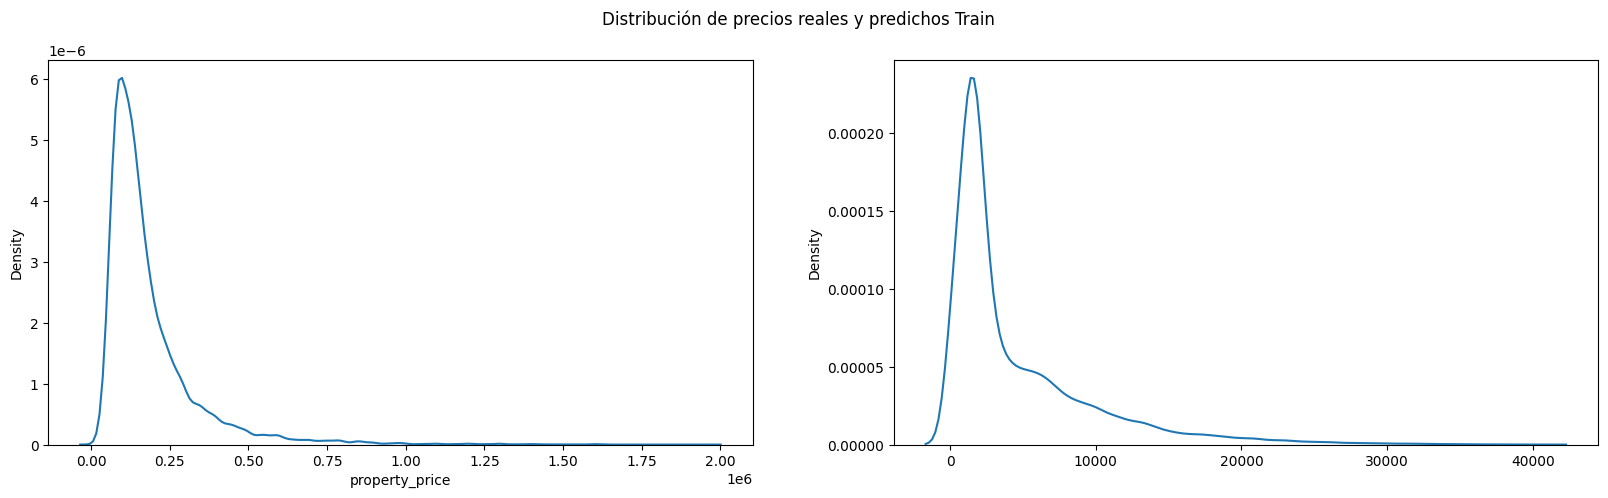

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Distribución de precios reales y predichos Train")

sns.kdeplot(precios_train['property_price'], ax=ax1)
sns.kdeplot(y_pred[:,0], ax=ax2)

Podemos ver que la campana real es bastante similar a la predicha tanto en train como en test. La campana predicha es levemente más baja habiendo menos densidad en los precios medios.

In [81]:
calcular_metricas_error("Metricas de train:", y_train, y_pred)
calcular_metricas_error("Metricas de test:", y_test, y_pred_test)

Metricas de train:
Error absoluto medio 180451.20094615003
Error cuadrático medio 54641635662.124535
Raiz del error cuadrático medio 233755.50402530533
R² -1.339976875192367
Metricas de test:
Error absoluto medio 167259.91610711868
Error cuadrático medio 44235767819.11964
Raiz del error cuadrático medio 210323.00829704685
R² -1.5492445828568777


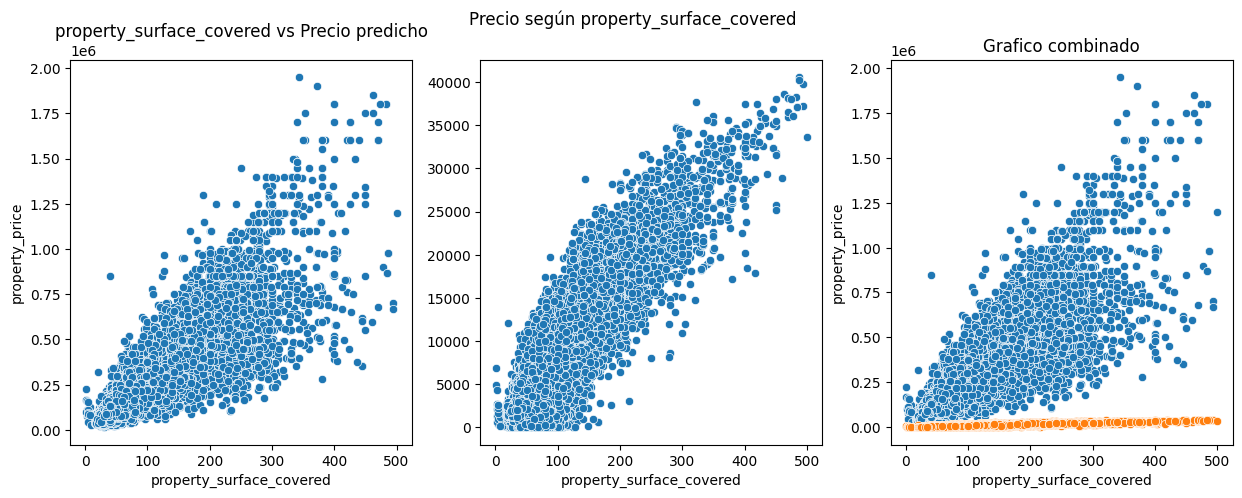

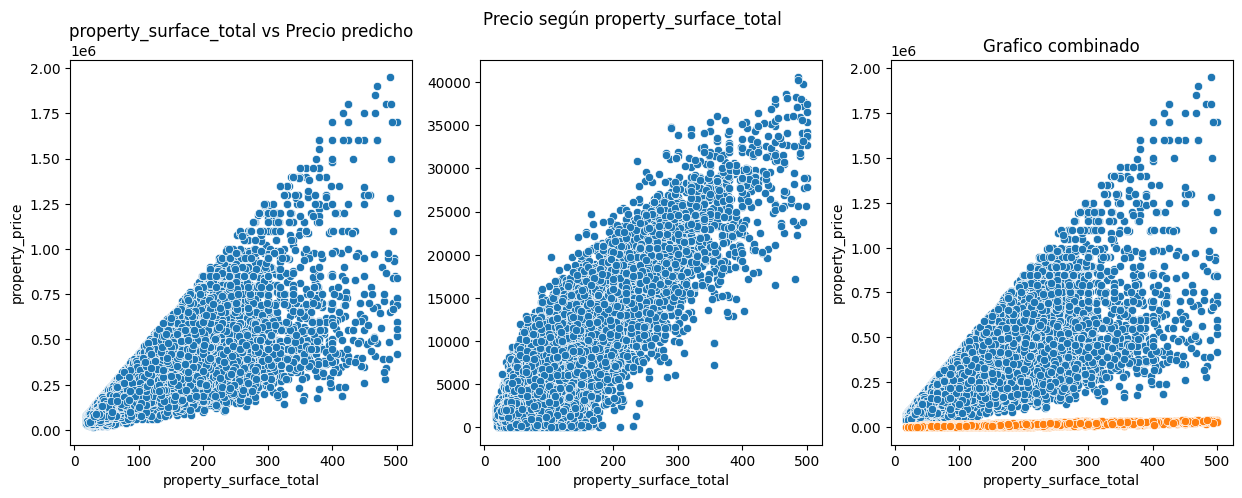

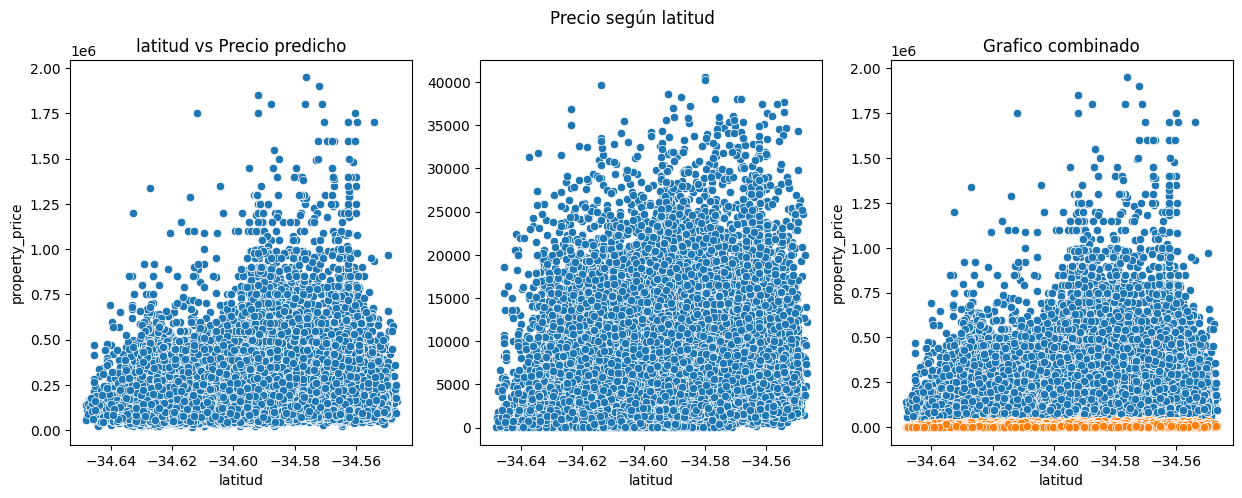

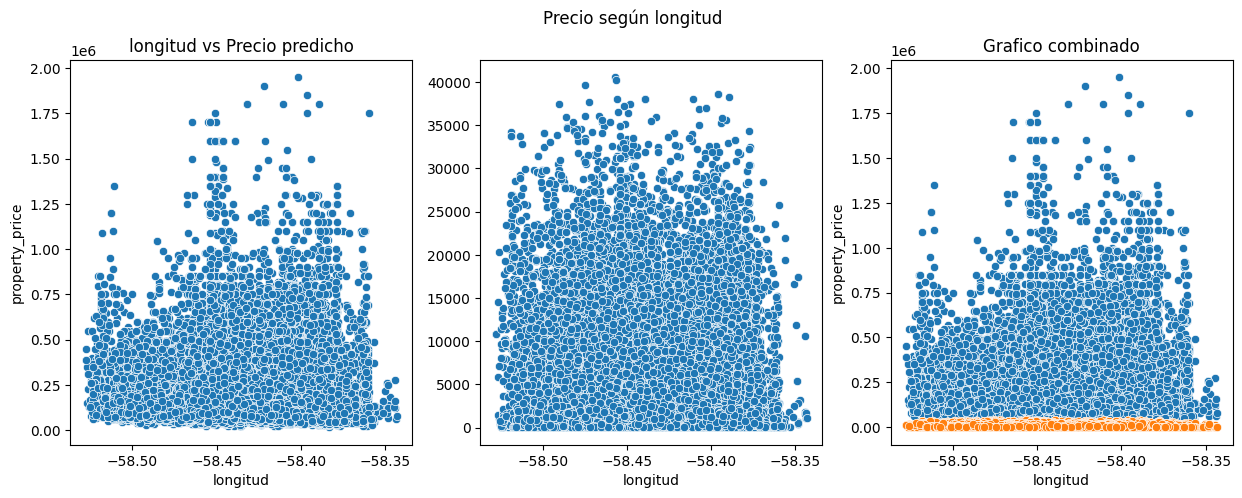

In [82]:
regression_scatter(ds_train.property_surface_covered, y_train, y_pred[:, 0])
regression_scatter(ds_train.property_surface_total, y_train, y_pred[:, 0])
regression_scatter(ds_train.latitud, y_train, y_pred[:, 0])
regression_scatter(ds_train.longitud, y_train, y_pred[:, 0])

#### Clasificación

In [60]:
def predicciones_clasificacion(modelo, x_train, x_test):
    # Predicciones Train
    output_modelo = modelo.predict(x_train)
    
    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_train_encoded, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)
    
    sns.heatmap(matriz_de_metricas,annot=True, cmap = 'Blues', fmt= 'g').set(title='Predicciones sobre el conjunto de entrenamiento')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))
    
    
    # Predicciones Test
    output_modelo = modelo.predict(x_test)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_test_encoded, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)
    
    sns.heatmap(matriz_de_metricas,annot=True, cmap = 'Blues', fmt= 'g').set(title='Predicciones sobre el conjunto de testeo')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))

##### Construcción del target

In [105]:
scaler = StandardScaler()
ohe = OneHotEncoder() 

ds_train_ohe= ds_train.copy()
property_type_encoded = ohe.fit_transform(ds_train_ohe[['property_type']].astype(str)).todense().astype(int)
property_type_encoded = pd.DataFrame(property_type_encoded).add_prefix('property_type_')

ds_train_encoded = pd.get_dummies(ds_train_ohe, columns=['property_type'])
# Droppeamos todas las columnas del dataset que no vamos a utilizar
x_train = ds_train_encoded.drop(axis = 1, columns = [
                                             "id",
                                             "start_date", 
                                             "end_date",
                                             "place_l3",
                                             "property_rooms",
                                             "property_bedrooms",
                                             "property_price",
                                             "property_title", 
                                             "pxm2", 
                                             'tipo_precio',
                                                    ])

# Escalamos los datos
x_train = scaler.fit_transform(pd.DataFrame(x_train))

# Construimos el target con la variable objetivo
y_train = ds_train.tipo_precio
y_train = np.array(y_train)

# Repetimos los pasos con el dataset de test
ds_test_ohe= ds_test.copy()
property_type_encoded = ohe.fit_transform(ds_test_ohe[['property_type']].astype(str)).todense().astype(int)
property_type_encoded = pd.DataFrame(property_type_encoded).add_prefix('property_type_')
ds_test_encoded = pd.get_dummies(ds_test_ohe, columns=['property_type'])
x_test = ds_test_encoded.drop(axis=1, columns= [
                    'id',
                    'start_date',
                    'end_date',
                    'place_l3',
                    'property_rooms',
                    'property_bedrooms',
                    'property_title', 
                    'property_price', 
                    'pxm2',
                    'tipo_precio',
                             ])

x_test = scaler.fit_transform(pd.DataFrame(x_test))
y_test = ds_test.tipo_precio
y_test = np.array(y_test)


# Realizamos el one hot encoder para transformar la variable target en numérica tanto en train como test
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoded = enc.transform(y_test[:, np.newaxis]).toarray()

##### Modelo

In [106]:
cantidad_de_posibles_respuestas=len(np.unique(y_train))
cantidad_de_variables_predictoras=len(x_train[0])

Probamos con un modelo base

In [107]:
modelo_base = keras.Sequential([
        keras.layers.Dense(cantidad_de_posibles_respuestas, input_shape=(cantidad_de_variables_predictoras,), activation= 'softmax')])

modelo_base.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 39        
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [108]:
modelo_base.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
    # Elegimos la siguiente función ya que se trata de una red neuronal de clasificación
  loss='categorical_crossentropy',
)

cant_epochs= 100

modelo_base.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 2s 532us/step - loss: 0.9643
Epoch 2/100
4320/4320 [==============================] - 2s 529us/step - loss: 0.9080
Epoch 3/100
4320/4320 [==============================] - 2s 563us/step - loss: 0.9029
Epoch 4/100
4320/4320 [==============================] - 2s 573us/step - loss: 0.9007
Epoch 5/100
4320/4320 [==============================] - 2s 565us/step - loss: 0.8995
Epoch 6/100
4320/4320 [==============================] - 2s 578us/step - loss: 0.8987
Epoch 7/100
4320/4320 [==============================] - 2s 543us/step - loss: 0.8984
Epoch 8/100
4320/4320 [==============================] - 2s 547us/step - loss: 0.8982
Epoch 9/100
4320/4320 [==============================] - 2s 551us/step - loss: 0.8982
Epoch 10/100
4320/4320 [==============================] - 2s 538us/step - loss: 0.8981
Epoch 11/100
4320/4320 [==============================] - 2s 539us/step - loss: 0.8979
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 2s 562us/step - loss: 0.8979
Epoch 96/100
4320/4320 [==============================] - 2s 562us/step - loss: 0.8979
Epoch 97/100
4320/4320 [==============================] - 2s 564us/step - loss: 0.8980
Epoch 98/100
4320/4320 [==============================] - 2s 561us/step - loss: 0.8978
Epoch 99/100
4320/4320 [==============================] - 2s 561us/step - loss: 0.8980
Epoch 100/100
4320/4320 [==============================] - 2s 565us/step - loss: 0.8978


2160/2160 [==============================] - 1s 463us/step


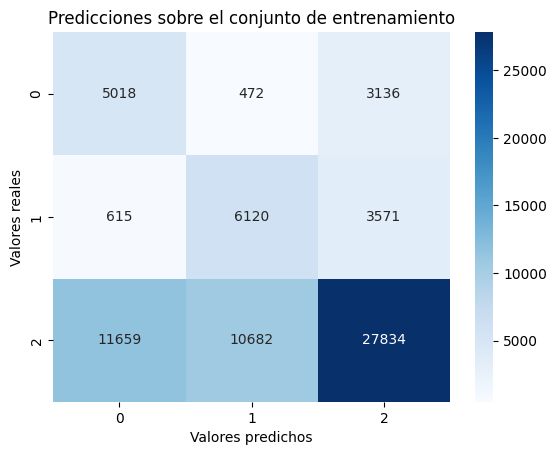

              precision    recall  f1-score   support

           0       0.29      0.58      0.39      8626
           1       0.35      0.59      0.44     10306
           2       0.81      0.55      0.66     50175

    accuracy                           0.56     69107
   macro avg       0.48      0.58      0.50     69107
weighted avg       0.67      0.56      0.59     69107

507/507 [==============================] - 0s 450us/step


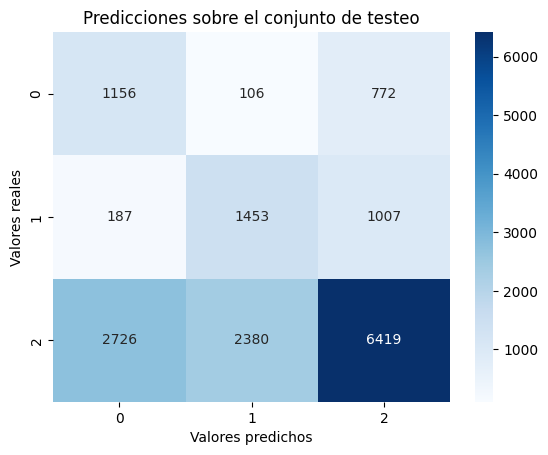

              precision    recall  f1-score   support

           0       0.28      0.57      0.38      2034
           1       0.37      0.55      0.44      2647
           2       0.78      0.56      0.65     11525

    accuracy                           0.56     16206
   macro avg       0.48      0.56      0.49     16206
weighted avg       0.65      0.56      0.58     16206



In [109]:
predicciones_clasificacion(modelo_base, x_train, x_test)

Probamos ahora agregando una capa intermeda

In [110]:
modelo_capa_extra = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,), activation= 'relu'),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation= 'softmax')
])

modelo_capa_extra.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 12)                156       
                                                                 
 dense_38 (Dense)            (None, 3)                 39        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [111]:
modelo_capa_extra.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

modelo_capa_extra.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 601us/step - loss: 0.9148
Epoch 2/100
4320/4320 [==============================] - 3s 607us/step - loss: 0.8742
Epoch 3/100
4320/4320 [==============================] - 3s 610us/step - loss: 0.8612
Epoch 4/100
4320/4320 [==============================] - 3s 606us/step - loss: 0.8551
Epoch 5/100
4320/4320 [==============================] - 3s 606us/step - loss: 0.8524
Epoch 6/100
4320/4320 [==============================] - 3s 611us/step - loss: 0.8505
Epoch 7/100
4320/4320 [==============================] - 3s 610us/step - loss: 0.8492
Epoch 8/100
4320/4320 [==============================] - 3s 605us/step - loss: 0.8480
Epoch 9/100
4320/4320 [==============================] - 3s 606us/step - loss: 0.8468
Epoch 10/100
4320/4320 [==============================] - 3s 601us/step - loss: 0.8451
Epoch 11/100
4320/4320 [==============================] - 3s 605us/step - loss: 0.8445
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 3s 611us/step - loss: 0.8317
Epoch 96/100
4320/4320 [==============================] - 3s 613us/step - loss: 0.8315
Epoch 97/100
4320/4320 [==============================] - 3s 636us/step - loss: 0.8312
Epoch 98/100
4320/4320 [==============================] - 3s 619us/step - loss: 0.8312
Epoch 99/100
4320/4320 [==============================] - 3s 611us/step - loss: 0.8311
Epoch 100/100
4320/4320 [==============================] - 3s 604us/step - loss: 0.8309


2160/2160 [==============================] - 1s 488us/step


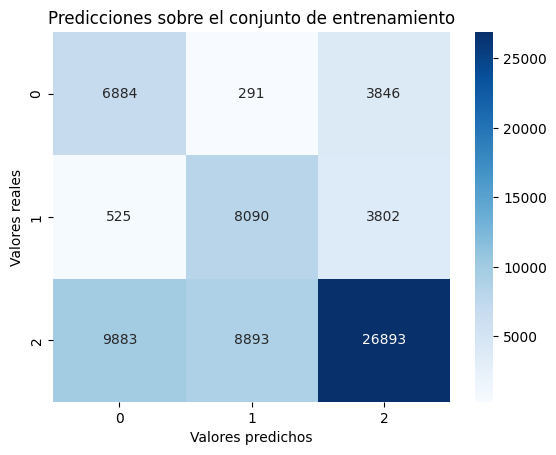

              precision    recall  f1-score   support

           0       0.40      0.62      0.49     11021
           1       0.47      0.65      0.54     12417
           2       0.78      0.59      0.67     45669

    accuracy                           0.61     69107
   macro avg       0.55      0.62      0.57     69107
weighted avg       0.66      0.61      0.62     69107

507/507 [==============================] - 0s 469us/step


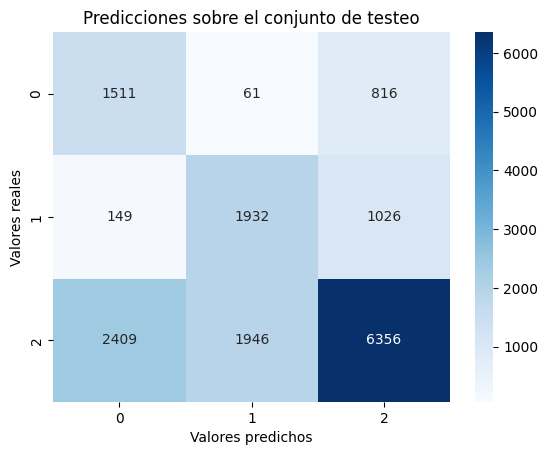

              precision    recall  f1-score   support

           0       0.37      0.63      0.47      2388
           1       0.49      0.62      0.55      3107
           2       0.78      0.59      0.67     10711

    accuracy                           0.60     16206
   macro avg       0.55      0.62      0.56     16206
weighted avg       0.66      0.60      0.62     16206



In [112]:
predicciones_clasificacion(modelo_capa_extra, x_train, x_test)

Optamos por agregar una capa intermedia de 12 neuronas con la función de activación reLU. Luego una capa de 6 neuronas con función tanh. Finalmente una capa de salida de 3 neuronas con la función de activación sigmoidea ya que se trata de un problema de clasificación.

In [113]:
modelo1 = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras,input_shape=(cantidad_de_variables_predictoras,), activation='relu'),
        keras.layers.Dense(cantidad_de_variables_predictoras / 2,activation= 'tanh'),
        keras.layers.Dense(cantidad_de_posibles_respuestas,activation='softmax')
])

modelo1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 12)                156       
                                                                 
 dense_40 (Dense)            (None, 6)                 78        
                                                                 
 dense_41 (Dense)            (None, 3)                 21        
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [114]:
modelo1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

modelo1.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 643us/step - loss: 0.8984
Epoch 2/100
4320/4320 [==============================] - 3s 643us/step - loss: 0.8611
Epoch 3/100
4320/4320 [==============================] - 3s 641us/step - loss: 0.8484
Epoch 4/100
4320/4320 [==============================] - 3s 639us/step - loss: 0.8407
Epoch 5/100
4320/4320 [==============================] - 3s 634us/step - loss: 0.8359
Epoch 6/100
4320/4320 [==============================] - 3s 646us/step - loss: 0.8325
Epoch 7/100
4320/4320 [==============================] - 3s 639us/step - loss: 0.8292
Epoch 8/100
4320/4320 [==============================] - 3s 636us/step - loss: 0.8269
Epoch 9/100
4320/4320 [==============================] - 3s 655us/step - loss: 0.8251
Epoch 10/100
4320/4320 [==============================] - 3s 657us/step - loss: 0.8230
Epoch 11/100
4320/4320 [==============================] - 3s 692us/step - loss: 0.8219
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 3s 659us/step - loss: 0.8093
Epoch 96/100
4320/4320 [==============================] - 3s 661us/step - loss: 0.8092
Epoch 97/100
4320/4320 [==============================] - 3s 649us/step - loss: 0.8092
Epoch 98/100
4320/4320 [==============================] - 3s 638us/step - loss: 0.8094
Epoch 99/100
4320/4320 [==============================] - 3s 642us/step - loss: 0.8093
Epoch 100/100
4320/4320 [==============================] - 3s 652us/step - loss: 0.8093


Como optimizador decidimos utilizar Adam con un learning rate lo suficientemente bajo como para no realizar saltos demasiado grandes a la hora de converger.

2160/2160 [==============================] - 1s 488us/step


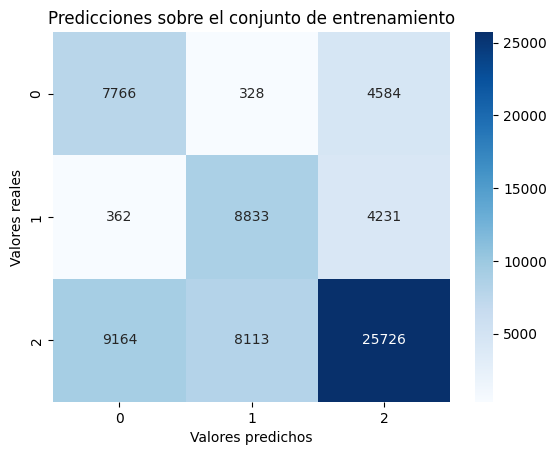

              precision    recall  f1-score   support

           0       0.45      0.61      0.52     12678
           1       0.51      0.66      0.58     13426
           2       0.74      0.60      0.66     43003

    accuracy                           0.61     69107
   macro avg       0.57      0.62      0.59     69107
weighted avg       0.65      0.61      0.62     69107

507/507 [==============================] - 0s 465us/step


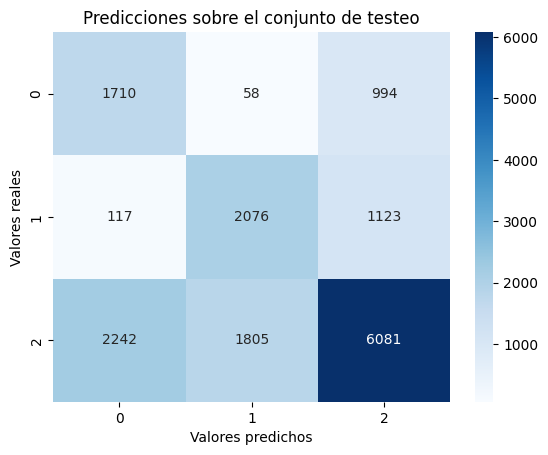

              precision    recall  f1-score   support

           0       0.42      0.62      0.50      2762
           1       0.53      0.63      0.57      3316
           2       0.74      0.60      0.66     10128

    accuracy                           0.61     16206
   macro avg       0.56      0.62      0.58     16206
weighted avg       0.64      0.61      0.62     16206



In [115]:
predicciones_clasificacion(modelo1, x_train, x_test)

Siguiente modelo

In [160]:
modelo2 = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras,input_shape=(cantidad_de_variables_predictoras,), activation='relu'),
        keras.layers.Dense(cantidad_de_variables_predictoras * 2,activation= 'tanh'),
        keras.layers.Dense(cantidad_de_posibles_respuestas,activation='softmax')
])

modelo2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 12)                156       
                                                                 
 dense_73 (Dense)            (None, 24)                312       
                                                                 
 dense_74 (Dense)            (None, 3)                 75        
                                                                 
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

historia_entrenamiento_modelo = modelo2.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 652us/step - loss: 0.8978
Epoch 2/100
4320/4320 [==============================] - 3s 675us/step - loss: 0.8586
Epoch 3/100
4320/4320 [==============================] - 3s 677us/step - loss: 0.8486
Epoch 4/100
4320/4320 [==============================] - 3s 662us/step - loss: 0.8413
Epoch 5/100
4320/4320 [==============================] - 3s 667us/step - loss: 0.8348
Epoch 6/100
4320/4320 [==============================] - 3s 639us/step - loss: 0.8298
Epoch 7/100
4320/4320 [==============================] - 3s 642us/step - loss: 0.8251
Epoch 8/100
4320/4320 [==============================] - 3s 662us/step - loss: 0.8213
Epoch 9/100
4320/4320 [==============================] - 3s 658us/step - loss: 0.8186
Epoch 10/100
4320/4320 [==============================] - 3s 654us/step - loss: 0.8163
Epoch 11/100
4320/4320 [==============================] - 3s 645us/step - loss: 0.8151
Epoch 12/100
4320/4320 [============================

In [ ]:
predicciones_clasificacion(modelo2, x_train, x_test)

Vemos que ampliar la cantidad de neuronas de la capa intermedia mejora las métricas del modelo

In [120]:
modelo3 = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras,input_shape=(cantidad_de_variables_predictoras,), activation='relu'),
        keras.layers.Dense(cantidad_de_variables_predictoras * 4,activation= 'tanh'),
        keras.layers.Dense(cantidad_de_posibles_respuestas,activation='softmax')
])

modelo3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 12)                156       
                                                                 
 dense_46 (Dense)            (None, 48)                624       
                                                                 
 dense_47 (Dense)            (None, 3)                 147       
                                                                 
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________


In [121]:
modelo3.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

modelo3.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 644us/step - loss: 0.8934
Epoch 2/100
4320/4320 [==============================] - 3s 642us/step - loss: 0.8587
Epoch 3/100
4320/4320 [==============================] - 3s 637us/step - loss: 0.8491
Epoch 4/100
4320/4320 [==============================] - 3s 637us/step - loss: 0.8436
Epoch 5/100
4320/4320 [==============================] - 3s 637us/step - loss: 0.8398
Epoch 6/100
4320/4320 [==============================] - 3s 629us/step - loss: 0.8361
Epoch 7/100
4320/4320 [==============================] - 3s 637us/step - loss: 0.8326
Epoch 8/100
4320/4320 [==============================] - 3s 640us/step - loss: 0.8286
Epoch 9/100
4320/4320 [==============================] - 3s 669us/step - loss: 0.8253
Epoch 10/100
4320/4320 [==============================] - 3s 639us/step - loss: 0.8218
Epoch 11/100
4320/4320 [==============================] - 3s 657us/step - loss: 0.8194
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 3s 675us/step - loss: 0.7815
Epoch 96/100
4320/4320 [==============================] - 3s 666us/step - loss: 0.7809
Epoch 97/100
4320/4320 [==============================] - 3s 666us/step - loss: 0.7807
Epoch 98/100
4320/4320 [==============================] - 3s 675us/step - loss: 0.7810
Epoch 99/100
4320/4320 [==============================] - 3s 669us/step - loss: 0.7814
Epoch 100/100
4320/4320 [==============================] - 3s 701us/step - loss: 0.7815


2160/2160 [==============================] - 1s 501us/step


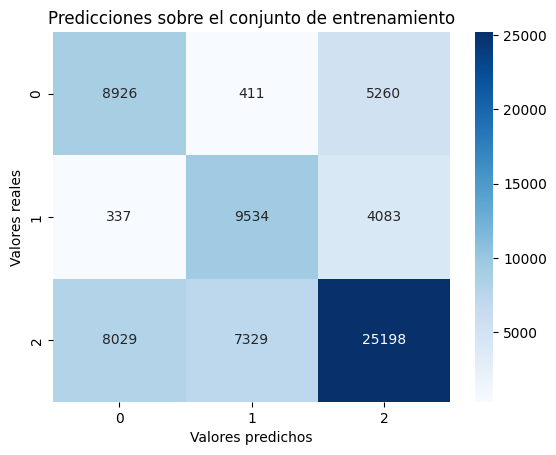

              precision    recall  f1-score   support

           0       0.52      0.61      0.56     14597
           1       0.55      0.68      0.61     13954
           2       0.73      0.62      0.67     40556

    accuracy                           0.63     69107
   macro avg       0.60      0.64      0.61     69107
weighted avg       0.65      0.63      0.64     69107

507/507 [==============================] - 0s 471us/step


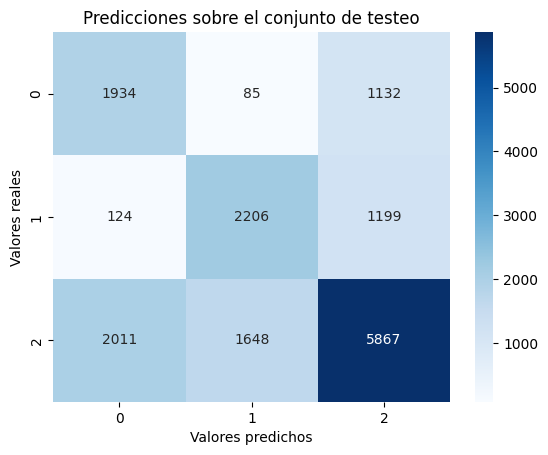

              precision    recall  f1-score   support

           0       0.48      0.61      0.54      3151
           1       0.56      0.63      0.59      3529
           2       0.72      0.62      0.66      9526

    accuracy                           0.62     16206
   macro avg       0.58      0.62      0.60     16206
weighted avg       0.64      0.62      0.62     16206



In [122]:
predicciones_clasificacion(modelo3, x_train, x_test)

No parecerían mejorar las métricas de test, por lo que seguir agregando neuronas a esta capa resultaría en un overfitteo. Veamos de todos modos que pasa si aumentamos la cantidad de la primera capa.

In [142]:
modelo4 = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras * 2,input_shape=(cantidad_de_variables_predictoras,), activation='relu'),
        keras.layers.Dense(cantidad_de_variables_predictoras * 2,activation= 'tanh'),
        keras.layers.Dense(cantidad_de_posibles_respuestas,activation='softmax')
])

modelo4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 24)                312       
                                                                 
 dense_64 (Dense)            (None, 24)                600       
                                                                 
 dense_65 (Dense)            (None, 3)                 75        
                                                                 
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [143]:
modelo4.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

historia_modelo = modelo4.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 681us/step - loss: 0.8871
Epoch 2/100
4320/4320 [==============================] - 3s 667us/step - loss: 0.8563
Epoch 3/100
4320/4320 [==============================] - 3s 662us/step - loss: 0.8460
Epoch 4/100
4320/4320 [==============================] - 3s 659us/step - loss: 0.8364
Epoch 5/100
4320/4320 [==============================] - 3s 667us/step - loss: 0.8289
Epoch 6/100
4320/4320 [==============================] - 3s 671us/step - loss: 0.8224
Epoch 7/100
4320/4320 [==============================] - 3s 671us/step - loss: 0.8179
Epoch 8/100
4320/4320 [==============================] - 3s 667us/step - loss: 0.8136
Epoch 9/100
4320/4320 [==============================] - 3s 675us/step - loss: 0.8102
Epoch 10/100
4320/4320 [==============================] - 3s 661us/step - loss: 0.8076
Epoch 11/100
4320/4320 [==============================] - 3s 664us/step - loss: 0.8052
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 3s 672us/step - loss: 0.7744
Epoch 96/100
4320/4320 [==============================] - 3s 676us/step - loss: 0.7735
Epoch 97/100
4320/4320 [==============================] - 3s 686us/step - loss: 0.7735
Epoch 98/100
4320/4320 [==============================] - 3s 672us/step - loss: 0.7738
Epoch 99/100
4320/4320 [==============================] - 3s 672us/step - loss: 0.7741
Epoch 100/100
4320/4320 [==============================] - 3s 674us/step - loss: 0.7735


2160/2160 [==============================] - 1s 495us/step


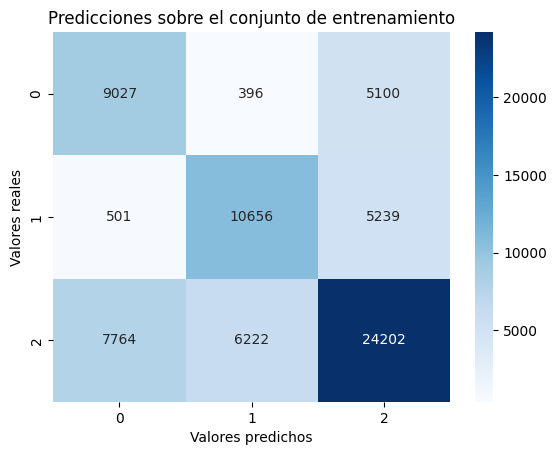

              precision    recall  f1-score   support

           0       0.52      0.62      0.57     14523
           1       0.62      0.65      0.63     16396
           2       0.70      0.63      0.67     38188

    accuracy                           0.64     69107
   macro avg       0.61      0.64      0.62     69107
weighted avg       0.64      0.64      0.64     69107

507/507 [==============================] - 0s 478us/step


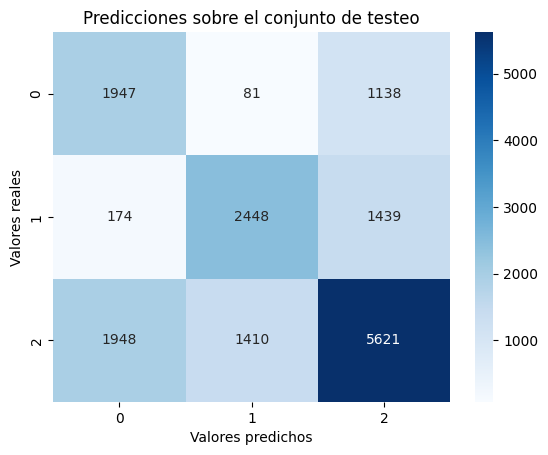

              precision    recall  f1-score   support

           0       0.48      0.61      0.54      3166
           1       0.62      0.60      0.61      4061
           2       0.69      0.63      0.65      8979

    accuracy                           0.62     16206
   macro avg       0.60      0.61      0.60     16206
weighted avg       0.63      0.62      0.62     16206



In [144]:
predicciones_clasificacion(modelo4, x_train, x_test)

Las métricas no mejoraron, nos quedamos con el modelo anterior. Veamos de todos modos si dicho modelo da mejores resultados con su ultima capa siendo de activación Sigmoid en vez de Softmax.

In [154]:
modelo3_sigmoid = keras.Sequential([
        keras.layers.Dense(cantidad_de_variables_predictoras,input_shape=(cantidad_de_variables_predictoras,), activation='relu'),
        keras.layers.Dense(cantidad_de_variables_predictoras * 2,activation= 'tanh'),
        keras.layers.Dense(cantidad_de_posibles_respuestas,activation='sigmoid')
])

modelo3_sigmoid.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 12)                156       
                                                                 
 dense_67 (Dense)            (None, 24)                312       
                                                                 
 dense_68 (Dense)            (None, 3)                 75        
                                                                 
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [155]:
modelo3_sigmoid.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
)

cant_epochs= 100

modelo3_sigmoid.fit(x_train,y_train_encoded,epochs=cant_epochs,batch_size=16,verbose=True, workers= -1, use_multiprocessing=True)

Epoch 1/100
4320/4320 [==============================] - 3s 625us/step - loss: 0.8984
Epoch 2/100
4320/4320 [==============================] - 3s 659us/step - loss: 0.8618
Epoch 3/100
4320/4320 [==============================] - 3s 662us/step - loss: 0.8530
Epoch 4/100
4320/4320 [==============================] - 3s 653us/step - loss: 0.8468
Epoch 5/100
4320/4320 [==============================] - 3s 650us/step - loss: 0.8411
Epoch 6/100
4320/4320 [==============================] - 3s 648us/step - loss: 0.8367
Epoch 7/100
4320/4320 [==============================] - 3s 647us/step - loss: 0.8329
Epoch 8/100
4320/4320 [==============================] - 3s 649us/step - loss: 0.8298
Epoch 9/100
4320/4320 [==============================] - 3s 634us/step - loss: 0.8266
Epoch 10/100
4320/4320 [==============================] - 3s 634us/step - loss: 0.8233
Epoch 11/100
4320/4320 [==============================] - 3s 639us/step - loss: 0.8201
Epoch 12/100
4320/4320 [============================

4320/4320 [==============================] - 3s 676us/step - loss: 0.7899
Epoch 96/100
4320/4320 [==============================] - 3s 673us/step - loss: 0.7897
Epoch 97/100
4320/4320 [==============================] - 3s 673us/step - loss: 0.7897
Epoch 98/100
4320/4320 [==============================] - 3s 704us/step - loss: 0.7902
Epoch 99/100
4320/4320 [==============================] - 3s 696us/step - loss: 0.7898
Epoch 100/100
4320/4320 [==============================] - 3s 683us/step - loss: 0.7894


2160/2160 [==============================] - 1s 486us/step


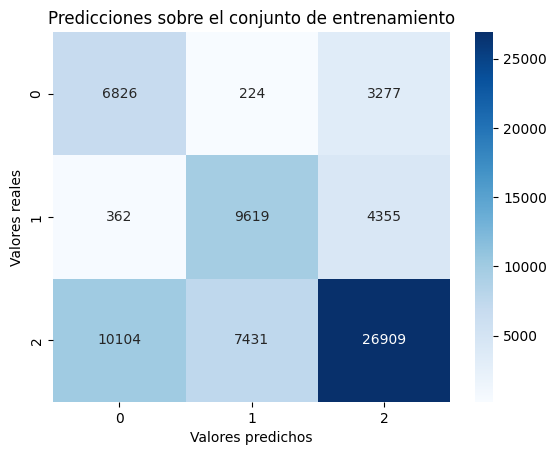

              precision    recall  f1-score   support

           0       0.39      0.66      0.49     10327
           1       0.56      0.67      0.61     14336
           2       0.78      0.61      0.68     44444

    accuracy                           0.63     69107
   macro avg       0.58      0.65      0.59     69107
weighted avg       0.68      0.63      0.64     69107

507/507 [==============================] - 0s 493us/step


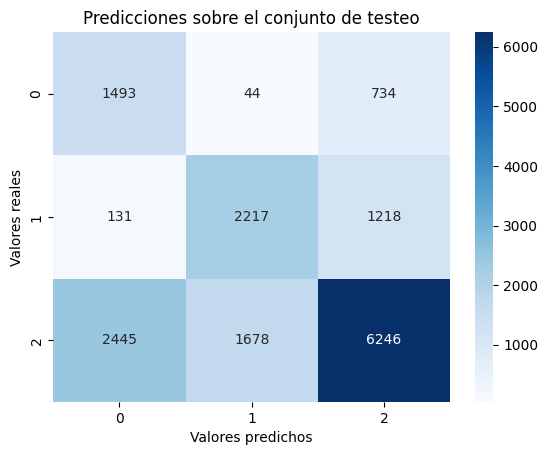

              precision    recall  f1-score   support

           0       0.37      0.66      0.47      2271
           1       0.56      0.62      0.59      3566
           2       0.76      0.60      0.67     10369

    accuracy                           0.61     16206
   macro avg       0.56      0.63      0.58     16206
weighted avg       0.66      0.61      0.63     16206



In [156]:
predicciones_clasificacion(modelo3_sigmoid, x_train, x_test)

Vemos que softmax parece dar mejores resultados. Nos quedamos con el anterior modelo como el mejor.

In [ ]:
mejor_modelo = modelo2

Veamos si el modelo está convergiendo bien al mínimo o si está rebotando en puntos debido a un learning rate demasiado alto

In [ ]:
epochs = range(cant_epochs)
plt.plot(epochs, historia_entrenamiento_modelo.history['loss'], color='orange', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolución del score de Loss con los Epochs")
plt.legend()

Parecería estar llegando al mínimo correctamente

#### Metricas finales

In [ ]:
predicciones_clasificacion(mejor_modelo, x_train, x_test)

## Ensambles de modelos

Otro factor interesante que podriamos analizar es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una ammenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta.
De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

### Ensamble 1

### Ensamble 2

## Conclusiones